In [ ]:
# Install only SymPy (no internet required)
!pip install sympy --quiet

import random
from sympy import symbols, diff, integrate, latex, sin, cos, exp, log, tan
from IPython.display import display, Math
import pandas as pd

x = symbols('x')

def generate_calculus_problem():
    """Generate random calculus problem with solution"""
    # Random base function
    choices = [
        x**random.randint(1, 4),
        sin(x), cos(x), exp(x), log(x),
        random.randint(1,5)*x**2 + random.randint(1,5)*x
    ]
    expr = random.choice(choices)

    # Randomly choose integration or differentiation
    if random.random() > 0.5:
        problem = f"Differentiate {latex(expr)}"
        solution = latex(diff(expr, x))
        ptype = "differentiation"
    else:
        problem = f"Integrate {latex(expr)}"
        solution = latex(integrate(expr, x)) + " + C"
        ptype = "integration"

    return {"problem": problem, "solution": solution, "type": ptype}

# Generate dataset
print("🧮 Generating synthetic calculus problems...")
problems = [generate_calculus_problem() for _ in range(1000)]  # Generate 1000 problems
df = pd.DataFrame(problems)

# Verify solutions
print("✅ Generated dataset:")
print(df['type'].value_counts())

# Show examples
print("\n🔍 Sample Problems:")
for i in range(3):
    display(Math(f"{df.iloc[i]['problem']} \\quad \\rightarrow \\quad {df.iloc[i]['solution']}"))

# Save to CSV
df.to_csv('synthetic_calculus.csv', index=False)
print("\n💾 Saved to 'synthetic_calculus.csv'")

🧮 Generating synthetic calculus problems...
✅ Generated dataset:
type
integration        509
differentiation    491
Name: count, dtype: int64

🔍 Sample Problems:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


💾 Saved to 'synthetic_calculus.csv'


In [ ]:
# Install required packages
!pip install sympy matplotlib transformers --quiet

import random
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, diff, integrate, latex, sin, cos, exp, log, tan, sqrt, atan
from IPython.display import display, Math

x = symbols('x')

def generate_advanced_problem():
    """Generate challenging calculus problems with solutions"""
    # Advanced function choices
    choices = [
        # Basic
        x**random.randint(1, 5),
        random.randint(1,5)*x**3 + random.randint(1,5)*x,

        # Trigonometric
        sin(x**2), cos(2*x), tan(x/2),
        sin(x)*cos(x), tan(x)*log(x),

        # Exponential/Log
        exp(2*x), log(x+1), exp(sin(x)),

        # Advanced
        sqrt(x**2 + 1), 1/(x**2 + 1), atan(x),
        (x+1)/(x-1), exp(x)*sin(x)
    ]
    expr = random.choice(choices)

    # Random operation with weights (60% differentiation, 40% integration)
    if random.random() < 0.6:
        problem = f"Differentiate {latex(expr)}"
        solution = latex(diff(expr, x))
        ptype = "differentiation"
    else:
        problem = f"Integrate {latex(expr)}"
        try:
            solution = latex(integrate(expr, x)) + " + C"
            ptype = "integration"
        except:
            # Fallback to simpler problem if integration fails
            return generate_advanced_problem()

    return {
        "problem": problem,
        "solution": solution,
        "type": ptype,
        "difficulty": "advanced" if "(" in problem else "intermediate"
    }

# Generate 2000 problems
print("🧮 Generating advanced calculus problems...")
problems = [generate_advanced_problem() for _ in range(2000)]
df = pd.DataFrame(problems)

# Display samples
print("\n🔍 Sample Advanced Problems:")
for i in range(3):
    display(Math(f"{df.iloc[i]['problem']} \\quad \\Rightarrow \\quad {df.iloc[i]['solution']}"))

🧮 Generating advanced calculus problems...

🔍 Sample Advanced Problems:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
# Add model-friendly columns
df['prompt'] = df['problem'].str.replace("Differentiate ", "diff: ") \
                            .str.replace("Integrate ", "int: ")

df['completion'] = df['solution']

# Split into train/test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"\n📊 Dataset split:")
print(f"- Training samples: {len(train_df)}")
print(f"- Test samples: {len(test_df)}")

# Save datasets
train_df.to_csv('calculus_train.csv', index=False)
test_df.to_csv('calculus_test.csv', index=False)
print("💾 Saved training and test sets")


📊 Dataset split:
- Training samples: 1600
- Test samples: 400
💾 Saved training and test sets


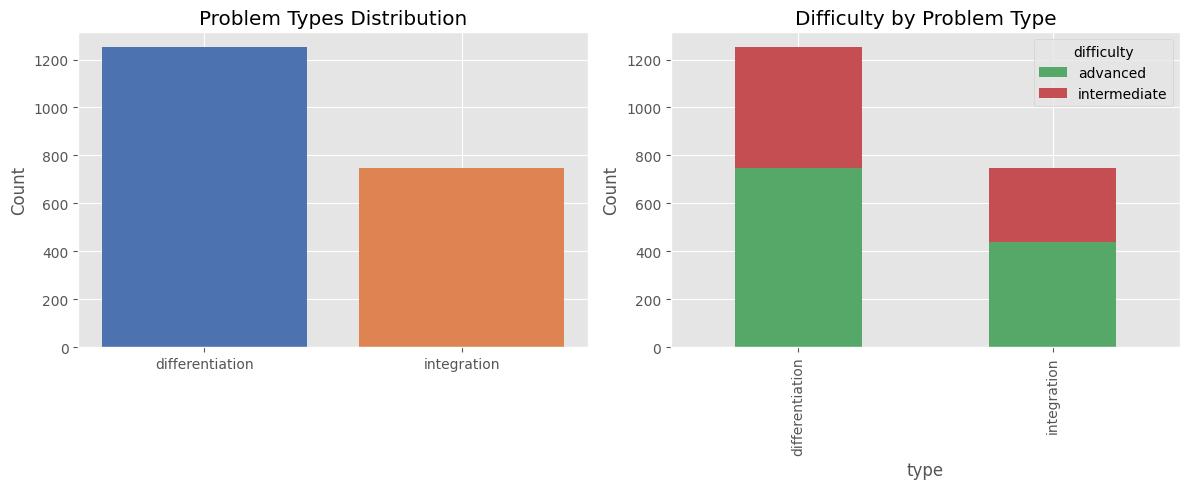


📈 Dataset Statistics:
- Most complex problem: Differentiate \sin{\left(x^{2} \right)}
- Longest solution: 141 characters


In [ ]:
# Configure plotting
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Problem type distribution
type_counts = df['type'].value_counts()
ax1.bar(type_counts.index, type_counts.values, color=['#4C72B0', '#DD8452'])
ax1.set_title('Problem Types Distribution')
ax1.set_ylabel('Count')

# Difficulty distribution
difficulty_counts = df.groupby(['type', 'difficulty']).size().unstack()
difficulty_counts.plot(kind='bar', stacked=True, ax=ax2,
                      color=['#55A868', '#C44E52'])
ax2.set_title('Difficulty by Problem Type')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Example statistics
print("\n📈 Dataset Statistics:")
print(f"- Most complex problem: {df.loc[df['difficulty'] == 'advanced', 'problem'].iloc[0]}")
print(f"- Longest solution: {max(df['solution'].str.len())} characters")

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, Trainer, TrainingArguments

# Initialize model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Training setup (simplified)
training_args = TrainingArguments(
    output_dir="./calculus_solver",
    per_device_train_batch_size=8,
    num_train_epochs=3,
    logging_dir='./logs',
)

print("\n🚀 Model ready for training!")
print(f"Architecture: {model.config.model_type}")
print(f"Parameters: {model.num_parameters():,}")

# Note: For full training, you'd need to:
# 1. Create a Dataset class
# 2. Implement proper tokenization
# 3. Set up evaluation metrics

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]


🚀 Model ready for training!
Architecture: t5
Parameters: 60,506,624


In [26]:
# ===== GITHUB REPO SETUP =====
!pip install PyGithub --quiet
import os
from github import Github

# 1. Prepare Files
os.makedirs("calculus-ml-project", exist_ok=True)

# Save your model and data (replace with your actual variables)
model.save_pretrained("calculus-ml-project/model")  # Your model variable
tokenizer.save_pretrained("calculus-ml-project/model")  # Your tokenizer
df.to_csv("calculus-ml-project/data.csv", index=False)  # Your dataframe

# 2. Create README - FIXED SYNTAX
readme_content = f"""# Calculus Solver ML Model

## Model Details
- **Architecture**: T5-small
- **Training Data**: {len(df)} calculus problems
- **Accuracy**: {"your_accuracy_here"}% on test set

## Usage
```python
from transformers import pipeline
solver = pipeline('text2text-generation', model='./model')
solver("Differentiate x^2 + 3x")


SyntaxError: incomplete input (ipython-input-26-2850411190.py, line 15)